In [41]:
# importiere package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

%matplotlib inline

In [19]:
# data importieren
data = pd.read_csv('data/eurodist.csv')
print(data)

               city  Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne  \
0            Athens       0       3313      2963    3175       3339     2762   
1         Barcelona    3313          0      1318    1326       1294     1498   
2          Brussels    2963       1318         0     204        583      206   
3            Calais    3175       1326       204       0        460      409   
4         Cherbourg    3339       1294       583     460          0      785   
5           Cologne    2762       1498       206     409        785        0   
6        Copenhagen    3276       2218       966    1136       1545      760   
7            Geneva    2610        803       677     747        853     1662   
8         Gibraltar    4485       1172      2256    2224       2047     2436   
9           Hamburg    2977       2018       597     714       1115      460   
10  Hook of Holland    3030       1490       172     330        731      269   
11           Lisbon    4532       1305  

In [20]:
m,n = data.shape
print(n, m)

22 21


In [21]:
data = data.iloc[:,1:]
data

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
8,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [22]:
model = MDS(n_components=2, metric=True, n_init=21, random_state=0, dissimilarity='precomputed')

X_trans =model.fit_transform(data)

print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model.n_iter_)
print('Stress: ', model.stress_)

The new shape of X:  (21, 2)
No. of Iterations:  72
Stress:  3356547.2992503727


In [63]:
scores_df = pd.DataFrame(X_trans, columns=['PC1', 'PC2'], index=data.columns)
scores_df

,PC1,PC2
Athens,1199.216796,-2482.958972
Barcelona,782.988781,605.361747
Brussels,-407.454542,42.597690
Calais,-451.392914,235.312310
Cherbourg,-344.233513,577.157903
Cologne,-536.051429,-169.463203
Copenhagen,-1208.559000,-392.426351
Geneva,309.168193,-55.003180
Gibraltar,1158.119158,1734.350838
Hamburg,-865.110508,-373.450797


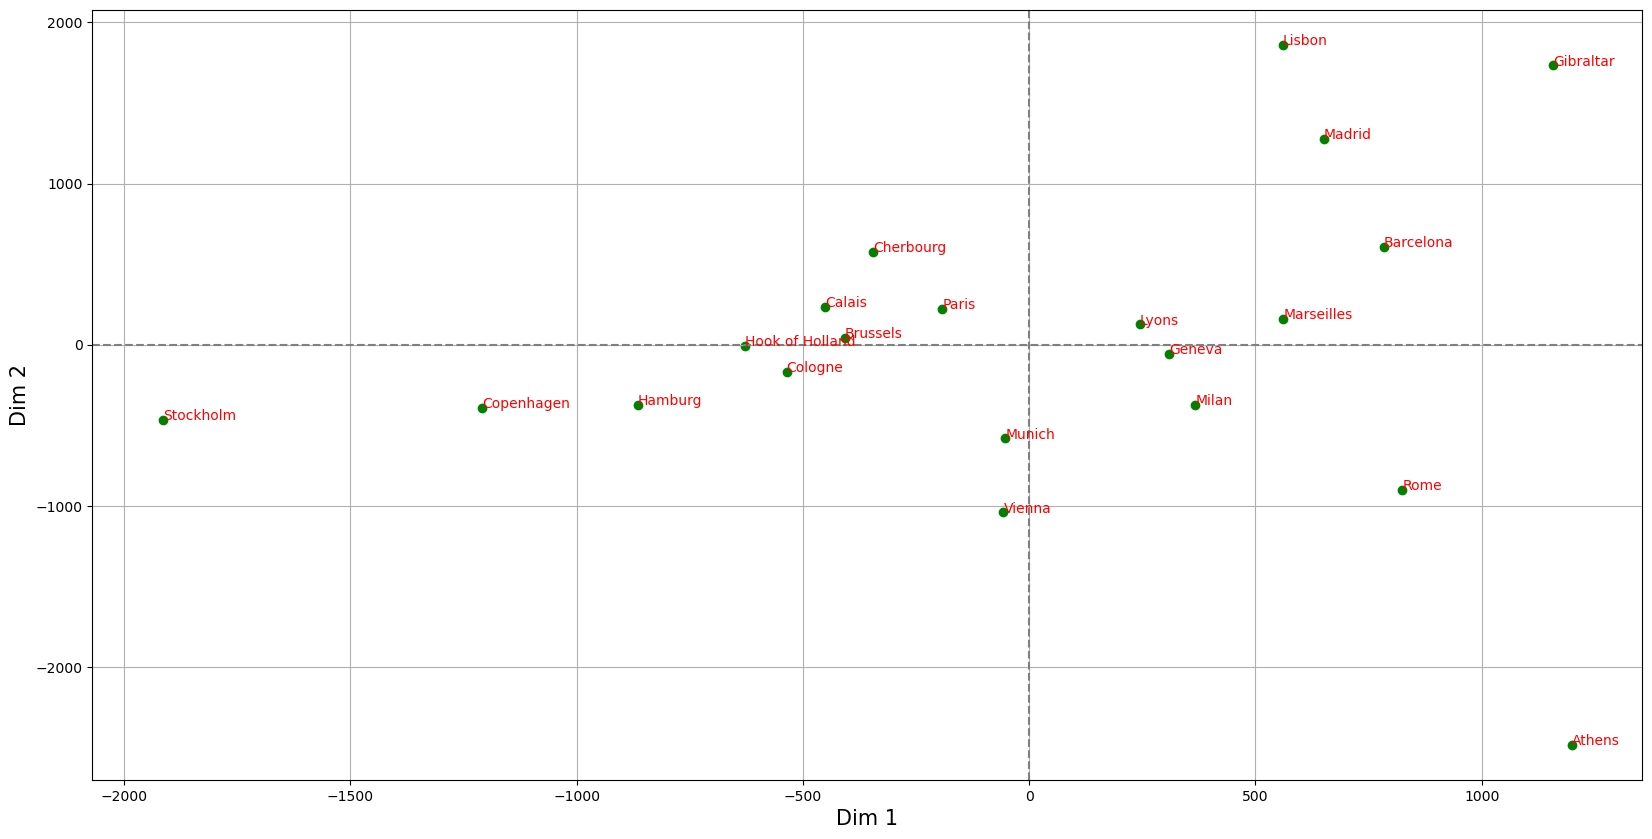

In [62]:
def plot_scatter():
    fig, ax = plt.subplots(figsize = (20, 10))
    plt.scatter(data= scores_df, x='PC1', y='PC2', c = 'g')

    for i in scores_df.index:
        ax.text(x=scores_df.loc[str(i)]['PC1'], y=scores_df.loc[str(i)]['PC2'], s=str(i), color='r')

    ax.set_xlabel('Dim 1', fontsize = 15)
    ax.set_ylabel('Dim 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.show()
plot_scatter()
